In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# These functions return the time derivatives of protein concentrations for constitutive gene expression,
# negative autoregulation, positive autoregulation and negative autoregulation with cooperativity.

# Negative autoregulation represents the case where a protein represses its own production. Positive autoregulation
# represents the case where a protein activates its own production. Cooperativity results when monomers of a protein
# bind together to form protein complexes and then activate/repress gene expression.

def noreg(y,t,alpha,beta):
    return alpha-beta*y

def negreg(y,t,alpha,beta):
    return alpha*1/(1+y) - beta*y

def posreg(y,t,alpha,beta):
    return alpha*y/(1+y) - beta*y

def posregwithcoop(y,t,alpha,beta):
    return alpha*y**1.9/(1+y**1.9) - beta*y

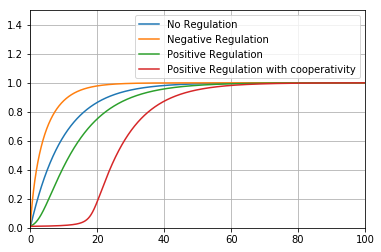

In [15]:
# This block of code generates t vs protein concentration plots for the above described functions.

# Negative autoregulation seems to generate a faster response compared to the case of constitutive gene expression.
# Positive autoregulation results in a slower response, but incorporatese bistability in the system. This can be
# observed by changing the initial value of y in the simulations. For an initial value of 0, we find no gene expression.
# However, if we start with a small positive value of y, we find that the system reaches its other "high" steady state.
# Incorporating cooperativity in activator binding results in a more sigmoidal/digital response compared to the case
# with no cooperativity. NOTE THAT WE ARE COMPARING PROTEIN CONCENTRATIONS NORMALIZED TO THEIR STEADY STATE VALUES.

t = np.linspace(0,100,10000)
y_noreg = odeint(noreg,0,t,args=(1,0.1))
y_negreg = odeint(negreg,0,t,args=(1,0.1))
y_posreg = odeint(posreg,0.1,t,args=(1,0.1))
y_posregwithcoop = odeint(posregwithcoop,0.1,t,args=(1,0.1))


y_noreg[:,0] = y_noreg[:,0]/y_noreg[-1,0]
y_negreg[:,0] = y_negreg[:,0]/y_negreg[-1,0]
y_posreg[:,0] = y_posreg[:,0]/y_posreg[-1,0]
y_posregwithcoop[:,0] = y_posregwithcoop[:,0]/y_posregwithcoop[-1,0]

plt.plot(t,y_noreg[:,0],label='No Regulation')
plt.plot(t,y_negreg[:,0],label='Negative Regulation')
plt.plot(t,y_posreg[:,0],label='Positive Regulation')
plt.plot(t,y_posregwithcoop[:,0],label='Positive Regulation with cooperativity')


plt.grid(True)
plt.axis([0,100,0,1.5])
plt.legend()
plt.show()

In [5]:
# This function models the type 1 coherent feedforward loop. Here, an input X activates production of Y. The output
# is activated by both X AND Y being present.

# X ----> Y -----> Z AND X-----> Z

def coherentfeedforward(y,t):
    Y,Z = y
    
    X = 1*(t>10)*(t<15)+1*(t>100)*(t<175)
    changeY = 1*X**4/(10**4+X**4) - 0.1*Y
    changeZ = 1*(Y**4/(10**4+Y**4))*(X**4/(10**4+X**4)) - 0.1*Z
    
    return[changeY,changeZ]

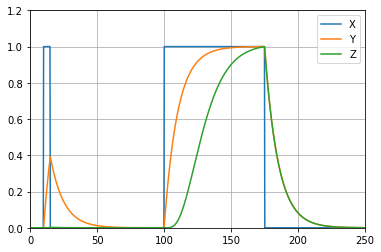

In [6]:
# This block of code generates t vs protein concentration plots for the type 1 coherent feedforward loop.

# The coherent feedforward loop introduces a delay in gene expression. This is useful to filter noise in a system.
# For example, in the plot shown below, if the input(X) is supplied only for a very short period of time, the output(Z)
# is not activated. However, for a sustained input(X), we see the generation of output(Z).

t = np.linspace(0,250,1000)
y_coherentfeedforward = odeint(coherentfeedforward,[0,0],t)

X = 1*(t>10)*(t<15)+1*(t>100)*(t<175)
y_coherentfeedforward[:,0]=y_coherentfeedforward[:,0]/max(y_coherentfeedforward[:,0])
y_coherentfeedforward[:,1]=y_coherentfeedforward[:,1]/max(y_coherentfeedforward[:,1])

plt.plot(t,X,label='X')
plt.plot(t,y_coherentfeedforward[:,0],label='Y')
plt.plot(t,y_coherentfeedforward[:,1],label='Z')

plt.grid(True)
plt.axis([0,250,0,1.2])
plt.legend()
plt.show()

In [7]:
# This function models the type 1 incoherent feedforward loop. In this case, X activates production of Y and Z. However,
# Y represses the production of Z.

# X ----> Y -----| Z AND X-----> Z

def incoherentfeedforward(y,t):
    Y,Z = y
    
    X = 1*(t>50)
    
    changeY = 1*X**4/(1**4+X**4) - 0.1*Y
    changeZ = 1*(1/(1**4+Y**4))*(X**4/(1**4+X**4)) - 0.1*Z
    
    return[changeY,changeZ]

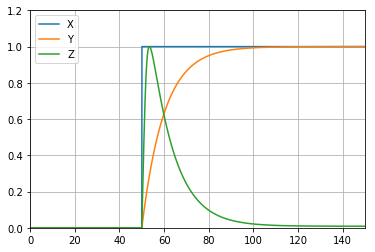

In [8]:
# This block of code generates t vs protein concentration plots for the type 1 incoherent feedforward loop.

# The incoherent feedforward loop results in generation of a pulse of output (Z) for a sustained input (X)

t = np.linspace(0,150,10000)
y_incoherentfeedforward = odeint(incoherentfeedforward,[0,0],t)

X = 1*(t>50)
y_incoherentfeedforward[:,0]=y_incoherentfeedforward[:,0]/max(y_incoherentfeedforward[:,0])
y_incoherentfeedforward[:,1]=y_incoherentfeedforward[:,1]/max(y_incoherentfeedforward[:,1])

plt.plot(t,X,label='X')
plt.plot(t,y_incoherentfeedforward[:,0],label='Y')
plt.plot(t,y_incoherentfeedforward[:,1],label='Z')

plt.grid(True)
plt.axis([0,150,0,1.2])
plt.legend()
plt.show()

In [17]:
# This function models the Single Input Module (SIM). Here, a single input(I) activates the expression of a series of 
# genes at different thresholds.
# I ----> X (Threshold 1)
# I ----> Y (Threshold 2)
# I ----> Z (Threshold 3)

def SIM(y,t):
    I, X, Y, Z = y
    
    kp=1
    kd=0.1
    changeI = kp-kd*I
    changeX = kp*(I>2)-kd*X
    changeY = kp*(I>5)-kd*Y
    changeZ = kp*(I>8)-kd*Z
    
    return [changeI, changeX, changeY, changeZ]

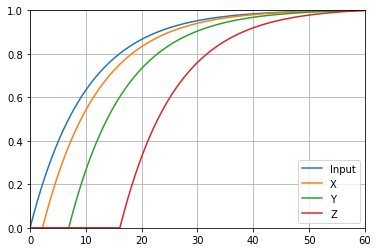

In [18]:
# The protein concentrations resulting from a single input module is shown below. It appears that having a Single Input Module
# results in sequential expression of genes.

t = np.linspace(0,60,10000)
y_SIM = odeint(SIM,[0,0,0,0],t)
y_SIM[:,0]=y_SIM[:,0]/y_SIM[-1,0]
y_SIM[:,1]=y_SIM[:,1]/y_SIM[-1,1]
y_SIM[:,2]=y_SIM[:,2]/y_SIM[-1,2]
y_SIM[:,3]=y_SIM[:,3]/y_SIM[-1,3]
plt.plot(t,y_SIM[:,0],label='Input')
plt.plot(t,y_SIM[:,1],label='X')
plt.plot(t,y_SIM[:,2],label='Y')
plt.plot(t,y_SIM[:,3],label='Z')

plt.grid(True)
plt.axis([0,60,0,1])
plt.legend()
plt.show()


In [19]:
# The property of ultrasensitivity results during cooperative binding of proteins to activate gene expression or in protein
# activation cascades like the MAPK cascade. Here, a more digital response is generated as cooperativity is increased - i.e. 
# the range of input concentrations at which the output goes from minimum to maximum is reduced to generate an on-off type response


def ultrasensitivity_test(Input):
    
    kp=10
    Kd=1
    
    Out1 = kp*Input/(Kd+Input)
    Out2 = kp*Input**2/(Kd**2+Input**2)
    Out3 = kp*Input**4/(Kd**4+Input**4)
    Out4 = kp*Input**8/(Kd**4+Input**8)
    return [Out1, Out2, Out3, Out4]

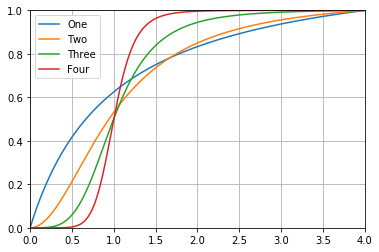

In [23]:
# The effect of ultrasensitivity is plotted below. Here, we plot the output concentration as it varies with input concentration
# for different values of cooperativity (or number of steps in a cascade)

Input = np.linspace(0,4,1000)
y_ultrasensitive = ultrasensitivity_test(Input)
y_ultrasensitive[0] = y_ultrasensitive[0]/y_ultrasensitive[0][-1]
y_ultrasensitive[1] = y_ultrasensitive[1]/y_ultrasensitive[1][-1]
y_ultrasensitive[2] = y_ultrasensitive[2]/y_ultrasensitive[2][-1]
y_ultrasensitive[3] = y_ultrasensitive[3]/y_ultrasensitive[3][-1]
plt.plot(Input,y_ultrasensitive[0],label='One')
plt.plot(Input,y_ultrasensitive[1],label='Two')
plt.plot(Input,y_ultrasensitive[2],label='Three')
plt.plot(Input,y_ultrasensitive[3],label='Four')


plt.grid(True)
plt.axis([0,4,0,1])
plt.legend()
#plt.show()

In [24]:
# A simple model of the genetic toggle switch is described below. A genetic toggle switch serves as a primitive mode of 
# cellular memory by incorporating bistability into gene regulation. It is generated by having two repressors repress each
# other's production.

def toggle(y,t):
    lac,tet = y
    kp=1
    kdeg=0.1
    n=2
    Kd=1
    
    changelac = kp/(Kd+tet**n) - kdeg*lac
    changetet = kp/(Kd+lac**n) - kdeg*tet
    
    return [changelac, changetet]

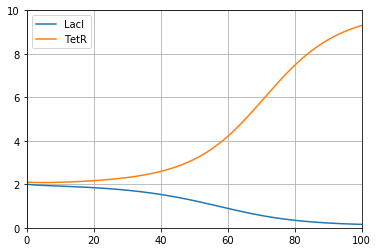

In [25]:
# Below, we see the response of the toggle switch model. The steady states reached by either protein depends on the initial
# concentrations of the proteins lacI and TetR used in the simulation. The toggle switch has 3 steady states - Two stable
# and one unstable (The unstable steady state is observed only in models and not in real systems). The unstable steady state
# can be observed in the model if the initial concentrations of both proteins are set to be the same. The two stable steady
# states can be observed by changing which protein is present in higher levels at the beginning of the simulation.

t = np.linspace(0,500,1000)
y_toggle = odeint(toggle,[2,2.1],t)
plt.plot(t,y_toggle[:,0],label='LacI')
plt.plot(t,y_toggle[:,1],label='TetR')


plt.grid(True)
plt.axis([0,100,0,10])
plt.legend()
plt.show()

In [16]:
# An oscillator results in temporal cycling of gene expression. It can be engineered by using three repressors as follows
# X ----| Y, Y ----| Z, Z ----| X

def oscillator(y,t):
    one,two,three = y
    kp=4
    kdeg=0.1
    n=4
    Kd=0.1
    
    changeone = kp/(Kd+two**n) - kdeg*one
    changetwo = kp/(Kd+three**n) - kdeg*two
    changethree= kp/(Kd+one**n) - kdeg*three
    
    return [changeone, changetwo, changethree]

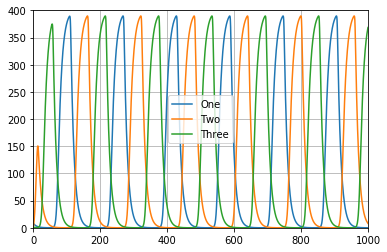

In [17]:
# The nature of oscillations are largely dependent on the parameters used to model the system. Depending on the parameters, we 
# may observe dampening/sustainable oscillations.

t = np.linspace(0,1000,10000)
y_toggle = odeint(oscillator,[1,0,1],t)
plt.plot(t,y_toggle[:,0],label='One')
plt.plot(t,y_toggle[:,1],label='Two')
plt.plot(t,y_toggle[:,2],label='Three')

plt.grid(True)
plt.axis([0,1000,0,400])
plt.legend()
plt.show()
